In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Importing data sets for regressions, and importing PCA
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA

In [2]:
# Generate correlated features
def generateRandomCovarianceVarianceMatrix(n_features):
    random_matrix = np.random.rand(n_features, n_features)

    # Create a symmetric matrix by taking the average of the matrix and its transpose
    var_cov_matrix = (random_matrix + random_matrix.T) / 2
    
    # Ensure the diagonal elements represent variances (non-negative values)
    var_cov_matrix[np.diag_indices(n_features)] = np.abs(var_cov_matrix[np.diag_indices(n_features)])

    # Ensure positive semidefiniteness
    eigenvalues, eigenvectors = np.linalg.eigh(var_cov_matrix)
    eigenvalues[eigenvalues < 0] = 0  # Replace negative eigenvalues with 0
    var_cov_matrix = np.dot(eigenvectors, np.dot(np.diag(eigenvalues), eigenvectors.T))

    return var_cov_matrix

# Defining a function to generate correlated features
def generateCorrelatedFeatures(n_features, n_samples, vc_matrix=None):
    if vc_matrix is None:
        vc_matrix = generateRandomCovarianceVarianceMatrix(n_features)
        
    return np.random.multivariate_normal(np.repeat(0, n_features), vc_matrix, size=n_samples)
    

## Illustration of PCA on a simple simulated dataset with 2 correlated features

### Data generation (2 features)

#### Tips for coding:

- Cursor at the the opening bracket--> SHIFT+TAB help to explain the function
- Another thing is the debugger
- View --> debugger panel on the right --> we get additional information
- View --> Table of contents

In [3]:
# Generate data

np.random.seed(20240304)

# 100 samples and 2 features
n_samples = 100
n_features = 2
X = generateCorrelatedFeatures(n_features, n_samples)

# Creating an outcome variable (this is not necessary for unsupervised learning methods, like PCA)
# We create a Y and use our model from the last session
def f(X):
    return X[:, 0] + X[:, 1]

# As soon as we created, we can see the new variables created
# We can check its type in the top-right consol, we don't need to check it separately

Y = f(X) + np.random.normal(size=n_samples)

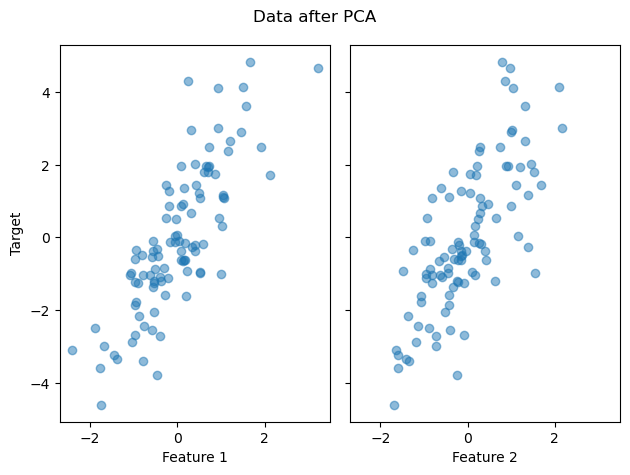

In [4]:
# Plot the original data
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

ax1.scatter(X[:, 0], Y, alpha=0.5)
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Target')

ax2.scatter(X[:, 1], Y, alpha=0.5)
ax2.set_xlabel('Feature 2')

fig.suptitle('Data after PCA')
fig.tight_layout()

### Running PCA (2 features)

We transform the coordinates of the original variables to capture as much
variation as we can with independent (orthogonal) dimensions.
For a very nice illustration and discussion, see [here](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues).


In [5]:
# finding the first PCA, maximize the total variance --> to combine the two features
# ... linearly in order to maximize the variance
# Red lines are the projected transformed dots from the 2D
# The soreaed of these dots are the highest when dots align with the red line
# so these projected points have to be the furthest from the origin to get the largest VAR

# Apply PCA and calculate the principal components as X_pca

pca = PCA()
# not the transformation of the original dataset --> we use fit and predict
# it's like scaling
# actually calculate the matrix --> transform the original 
X_pca = pca.fit_transform(X)

### Characteristics of PCA

Recap: We transform the coordinates of the original variables to capture as much variation as we can with independent (orthogonal) dimensions.
For a very nice illustration and discussion, see [this Cross Validated post](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues).


#### Plot principal components

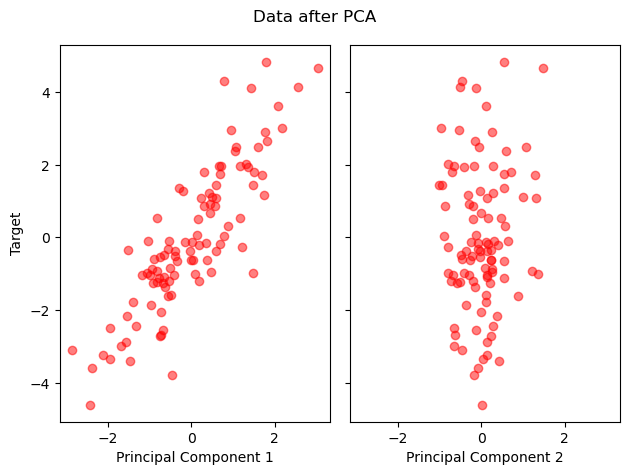

In [6]:
# Plot the PCA-transformed data
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
    
fig.suptitle('Data after PCA')

ax1.scatter(X_pca[:, 0], Y, color='red', alpha=0.5)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Target')

ax2.scatter(X_pca[:, 1], Y, color='red', alpha=0.5)
ax2.set_xlabel('Principal Component 2')

fig.tight_layout()
# we can see that instead of 

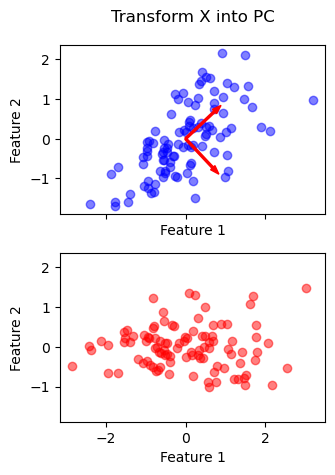

In [7]:
# Compare the space of X to the space of principal components
fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)
    
fig.suptitle('Transform X into PC')

ax1.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.5)
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_aspect('equal')

## This is our first distance from the origin (the first component)

ax1.arrow(0, 0, pca.components_[0, 0], pca.components_[1, 0], color = 'red', width = 0.05)
ax1.arrow(0, 0, pca.components_[0, 1], pca.components_[1, 1], color = 'red', width = 0.05)
# PCAs are not orthogonal(derékszögű), but they should be
# These scales are not equal in the two plots, equal distances (0,1) and (0,-1)
# 



## add the principal component transformation vectors to the plot once you know where to get the loadings from

## add a new plot about the transformed features (instead of X, we use X_pca)
# Much less variance to PCA2
# PCA tries to bind
ax2.scatter(X_pca[:, 0], X_pca[:, 1], color='red', alpha=0.5)
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_aspect('equal')


fig.tight_layout()
fig.tight_layout()
# the first dimension

#### Variance explained

In [8]:
(np.var(X[:, 0]), np.var(X[:, 1]))

(0.8546596978800847, 0.789082792017864)

In [9]:
total_variance_in_features = np.var(X[:, 0]) + np.var(X[:, 1])
total_variance_in_features

1.6437424898979487

In [10]:
pca.explained_variance_

array([1.36172338, 0.29862257])

In [11]:
pca.explained_variance_ / total_variance_in_features

array([0.82842866, 0.18167235])

In [12]:
pca.explained_variance_ratio_

array([0.82014437, 0.17985563])

In [13]:
print(f'The first principal component explains {round(pca.explained_variance_ratio_[0] * 100, 1)}% of the total variance')

The first principal component explains 82.0% of the total variance


#### Loadings/weights: how to transform the space of X into the space of principal components

In [14]:
pca.components_
# how to combine these 2 features into one feature, so that we get back PCA
# the wegith of the first feature is 0.7
# the second is 0.68 and etc
# We identify troops of features that contriute to the same component princiapl
# even if no outcome, PCA is good to learn about the relationship of your dataset

array([[ 0.728803  ,  0.68472343],
       [ 0.68472343, -0.728803  ]])

The squared loadings (weights) sum up to 1:

In [15]:
np.sum(pca.components_**2, axis=1)
# control exercises to make sure thet sum of squared variables are one
# constraints

array([1., 1.])

#### Orthogonality of principal components

Each principal component contains "independent" variance from the data:

In [16]:
sum(pca.components_[:, 0] * pca.components_[:, 1])
# Making sure that the sum is zero

0.0

## PCA as regularization (complexity reduction)

### Multivariate model

We work with an "approximately sparse" model: all features matter but to an exponentially decreasing extent.
- With many features
- All of the features matter in Y, but the coefficients are exponentially decreasing
- If we have 10 coeffs, 10 features, the betas are exponentially decreasing
- Approximately sparse model, some features matter more than others

In [17]:
def generateCoefficients(n_features):
    return [4 / (i + 1)**2 for i in range(n_features)]

def approximatelySparseF(X):
    beta = generateCoefficients(X.shape[1])
    return np.dot(X, beta)

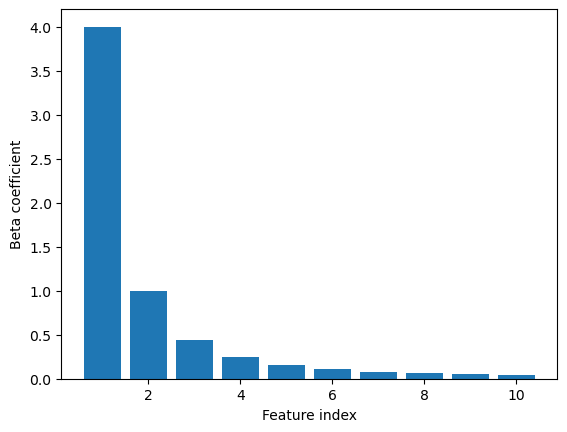

In [18]:
plt.bar([i + 1 for i in range(10)], generateCoefficients(10))
plt.ylabel("Beta coefficient")
plt.xlabel("Feature index")
plt.show()

### Uncorrelated predictors

#### Data generation (uncorrelated predictors)

In [19]:
np.random.seed(20240304)

# n features are large compared to the n samples
n_samples = 100
n_features = 40

# all of the features are uncorrelated and some random noise
# new Y is 100
# there is an uncorrelated X
X_uncorrelated = np.random.normal(0, 1, size=(n_samples, n_features)) # uncorrelated features
Y = approximatelySparseF(X_uncorrelated) + np.random.normal(size=n_samples)

#### Running PCA (uncorrelated predictors)

In [20]:
pca = PCA()
X_pca = pca.fit_transform(X_uncorrelated)

In [21]:
pca.explained_variance_ratio_
# how many certain variables capture the certain percentage of the variance?

array([0.06703083, 0.05634823, 0.05580766, 0.05089322, 0.04879297,
       0.04338137, 0.04237574, 0.04079594, 0.0388622 , 0.03866029,
       0.0354786 , 0.03386725, 0.03196637, 0.03021407, 0.02875075,
       0.02810891, 0.02753165, 0.02464783, 0.02353719, 0.02248769,
       0.020986  , 0.02028345, 0.01993288, 0.01698189, 0.01660667,
       0.01514228, 0.01446192, 0.01389558, 0.01244054, 0.01191888,
       0.00977018, 0.00884056, 0.0084217 , 0.00817128, 0.00727756,
       0.0066    , 0.00581094, 0.00512952, 0.0044551 , 0.0033343 ])

In [22]:
# setting the components a number, instead of the default 'None'
# Summarizes 95% of the total variance
pca95 = PCA(n_components=0.95)
# Transforming it and fitting it to the uncorrelated X features
X_pca95 = pca95.fit_transform(X_uncorrelated)
# 32 features could explain 95% of the total variance in the whole data set
X_pca95.shape[1]
# I can calculate the cumulative sum of this

32

In [23]:
# Another method without the need of creating a new PCA object
# This is just another method
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
np.argmax(cumulative_explained_variance > 0.95) + 1

32

In [24]:
print(f'{round(X_pca95.shape[1]/ n_features * 100, 1)}% of features explain 95% of the total variance.')

80.0% of features explain 95% of the total variance.


#### Is there an issue with the PCA above?
- We have to consider that they are orthogonal
- We started with uncorrelated predictors --> it means X1 is independent from X2, etc
- All of our features are already independent from each other, all features bring in some new variation
- There is no combination that better express the variation that they bring in
- Compressing this variation is nothing else is just fitting on the noise
- They are uncorrelated in their expected value
- If we had a million samples, we could observe, there is no correlation between each other --> they are already orthogonal so there is no need to transform them
- This is already 2-Fold
- Throughout the ML journey, we are estimating values
- A model might have a 0 bias in expected values, but it shouldn't mean that it's true in every realization of that data
- In expected value in the PCA, 95%
- In each cases we could find a combination that maximizes the variance, but in this case, this is what it captured

### Correlated predictors

#### Data generation

In [25]:
np.random.seed(20240304)

vc_matrix_fixed = generateRandomCovarianceVarianceMatrix(n_features)
X_correlated = generateCorrelatedFeatures(n_features, n_samples, vc_matrix_fixed)
Y = approximatelySparseF(X_correlated) + np.random.normal(size=n_samples)

#### Running PCA (correlated predictors)

In [27]:
# TODO: run PCA and look at what percentage of the features explain 95%+ of the total variance

pca = PCA(n_components=0.97)
# Transforming it and fitting it to the uncorrelated X features
X_pca = pca.fit_transform(X_correlated)
# 32 features could explain 95% of the total variance in the whole data set
X_pca.shape[1]

#print(f'{round(X_pca97.shape[1]/ n_features * 100, 1)}% of features explain 97% of the total variance.')

16

In [28]:
pca.components_

array([[-1.42974585e-01, -1.94768908e-01, -1.61671101e-01,
        -1.38195005e-01, -1.84251079e-01, -1.98428726e-01,
        -1.46805935e-01, -1.90977222e-01, -1.63351611e-01,
        -1.36974706e-01, -1.60749829e-01, -2.08424548e-01,
        -1.35807256e-01, -1.19065382e-01, -1.14493674e-01,
        -1.75598867e-01, -1.44293520e-01, -1.32019692e-01,
        -1.56505376e-01, -1.20234747e-01, -1.43296918e-01,
        -1.51577023e-01, -1.23280469e-01, -1.46968441e-01,
        -1.60280067e-01, -1.80594317e-01, -1.63060441e-01,
        -1.53524050e-01, -1.47619770e-01, -1.69803453e-01,
        -2.00521341e-01, -1.33532554e-01, -1.44629730e-01,
        -1.42595261e-01, -1.25205837e-01, -1.51879198e-01,
        -1.89002149e-01, -1.73176424e-01, -1.40597407e-01,
        -1.83415504e-01],
       [ 2.32018688e-01,  8.36000001e-02,  3.28337798e-01,
         1.71608297e-01,  4.72524877e-02,  1.98635489e-01,
         1.97715149e-01, -8.50921023e-04, -1.05178700e-01,
         1.83689184e-02,  1.04

### Estimate Y with all variables vs with the first few principal components

#### How to evaluate?

We used to evaluate our models in two different ways:

1. Monte Carlo simulation: generating many different data sets from the same data generation process and evaluating the performance at specific points, using our knowledge of the true outcome (with the irreducible error removed) - we could look at bias, variance and MSE.
2. Train-test split: take a data set and split it into two parts: use the train set to estimate the model and evaluate the performance on the test set (the result includes the irreducible error) - we could look at MSPE only.

Here we take the combination of these two approaches: We generate a 'test set' from the data generation process, and then evaluate the model on this set, using our knowledge of the true outcome (with the irreducible error removed). This allows us to focus on the irreducible part of the error, while still sticking to our one data set. We will look at the MSE.

In [29]:
# Generate test set
X_test = generateCorrelatedFeatures(n_features, n_samples, vc_matrix_fixed)
Y_test = approximatelySparseF(X_test)

#### OLS on all features

In [46]:
# setting the components a number, instead of the default 'None'
# Summarizes 95% of the total variance
pca = PCA()
# Transforming it and fitting it to the uncorrelated X features
X_pca = pca.fit_transform(X_correlated)
# 32 features could explain 95% of the total variance in the whole data set
n_cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_pca95 = np.argmax(cumulative_explained_variance > 0.95) + 1

print(f'{round(n_pca95/ n_features * 100, 1)}% of features explain 95% of the total variance.')

80.0% of features explain 95% of the total variance.


In [40]:
from sklearn.linear_model import LinearRegression

# we fitted on the original dataset
linreg_all_features = LinearRegression().fit(X_correlated, Y)
prediction = linreg_all_features.predict(X_test)
# predicted on the test set and got the MSE
mse_all = np.mean((prediction - Y_test)**2)
mse_all

0.8556429620750674

#### OLS on the first few principal components that capture 95% of the variance

In [51]:
linreg_pca95 = LinearRegression().fit(X_pca[:,:15], Y)
# we need to run this on the oca transformed
prediction = linreg_pca95.predict(pca.transform(X_test)[:,n_pca95]) #n_pca95
mse_pca95 = np.mean((prediction - Y_test)**2)
mse_pca95

ValueError: Expected 2D array, got 1D array instead:
array=[-2.94894411e-09 -6.96190789e-08 -2.42325024e-08 -6.44768499e-08
 -6.56450768e-08  6.50047597e-08  1.34896569e-08 -7.17634948e-08
  9.33032223e-09  5.84950762e-08  2.34007394e-10 -7.05649056e-08
 -5.21039934e-08 -2.62202258e-09 -2.27376078e-08 -4.80055763e-08
  6.14129811e-08 -1.18646909e-07  1.75741633e-08  4.70599676e-08
  4.61792752e-08  4.37005737e-08  2.89753507e-08 -6.44012475e-09
 -6.63331098e-09  1.95916214e-08 -3.92181809e-08 -1.92162083e-09
 -9.75002412e-08 -3.20603016e-08 -1.76960168e-09 -2.43768112e-08
  6.66463021e-09 -5.52719743e-08  1.25137345e-07 -3.55317411e-09
  1.86539227e-08 -2.57253835e-08 -1.06783144e-07 -5.89795107e-08
 -7.89459571e-09 -3.66881000e-08  5.08598117e-08  9.47484398e-08
  7.63596996e-09  3.98973708e-08 -5.33210200e-08 -1.98955722e-08
  9.52202009e-08  9.84435607e-09  4.67120411e-08  2.92904995e-09
 -6.80211351e-09  5.17276908e-08 -2.28132747e-09  2.18622331e-08
  2.94774398e-08 -2.47472322e-08  4.99247223e-08 -5.13615813e-08
 -7.36010638e-08  2.44517179e-10  3.65099082e-08  1.89294165e-08
  1.78188194e-09  4.55828542e-09 -2.28866161e-08  2.34530128e-08
  2.45869765e-08 -3.34292132e-09  6.52561312e-08 -5.31748130e-08
  2.80236890e-08 -1.48087865e-08 -3.39704161e-08 -8.78062115e-08
  2.43580668e-08  4.39240047e-08  1.05148327e-08  2.34922863e-08
  8.36784718e-08  3.85379886e-09 -1.32251339e-08  2.81549557e-08
 -1.16904511e-08 -3.22881259e-08 -3.24057768e-08  6.72389815e-08
 -4.62147498e-08 -2.02391328e-08 -5.75422863e-09 -2.44502870e-08
  5.64728645e-08 -5.79298442e-08  1.89378074e-08 -2.54855460e-08
  7.87489323e-09  1.01016214e-07  6.01400916e-08 -7.72957929e-08].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

#### Bias-variance trade-off

In [52]:
# TODO: Calculate MSE of OLS models by changing how many principal components is used
mse_results = []
for i in range(n_features):
    n_pc = i + 1
    # estimate linear regression
    linreg_pca95 = LinearRegression().fit(X_pca[:,:15], Y)
    # predict on X_test (do not forget to use the PC-s on X_test instead of the original features)
    prediction = linreg_pca95.predict(pca.transform(X_test)[:,:n_pca95])
    # calculate MSE as mse_pca
    mse_results.append(mse_pca)

ValueError: X has 32 features, but LinearRegression is expecting 15 features as input.

In [ ]:
# Chart
plt.plot([i + 1 for i in range(n_features)], mse_results)
plt.xlabel('Number of principal components')
plt.ylabel('MSE')
plt.title('Bias-variance trade-off in Principal Component Regression')
plt.show()

#### How would LASSO perform on this task?

Try it out at home ;)

## PCA on real data

From the ISLR website, we can download a gene expression data set (Ch10Ex11.csv) that consists of 40 tissue samples with measurements on 1,000 genes. The first 20 samples are from healthy patients, while the second 20 are from a diseased group.

We would have no chance to estimate any model on these 1,000 features. However, we could reduce the dimensionality with PCA. Then, we could look at the relation of the first few principal components (that captures part of the variance of _all_ 1,000 features) and the outcome.

In [53]:
import pandas as pd

# Read the CSV file
url = 'https://www.statlearning.com/s/Ch10Ex11.csv'
genes = pd.read_csv(url, header=None)

# Transpose the dataframe and convert to pandas DataFrame
genes = genes.T
genes = pd.DataFrame(genes)
print('Dimensions of genes dataframe:', genes.shape)

# Define health_status
health_status = ['healthy'] * 20 + ['diseased'] * 20


Dimensions of genes dataframe: (40, 1000)


In [ ]:
# TODO: apply PCA on the genes data and create pca_genes containing the first two principal components
pca = PCA()
pca.

In [55]:
pca.components[-1. :]

AttributeError: 'PCA' object has no attribute 'components'

In [54]:
plt.scatter(pca_genes[:, 0], pca_genes[:, 1], c=['red' if val == 'diseased' else 'green' for val in health_status], alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Health status by the first two principal components')

# Add empty scatter for legend
plt.scatter([], [], color='red', label='diseased')
plt.scatter([], [], color='green', label='healthy')
plt.legend()

plt.show()

NameError: name 'pca_genes' is not defined